<a href="https://colab.research.google.com/github/DeepasriMPrasad/PythonLearning/blob/master/Final_Classification_Assignment_Playgrnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Final assignment EDA -complete


loading all necessary libraries:

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn import tree
from IPython.display import display, HTML, Image
import random
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg



The "Census Income" dataset

### Dataset description:

[Dataset](https://drive.google.com/open?id=1-Hx6mFfxetRPP7Yd0k_e_7biRK4pjwiF). Use this link to add the dataset to your google drive. Mount your drive to get access the dataset using read csv function with proper path.

UCI Adult (no need to download it, we have a copy in the course repository): classify people using demographical data - whether they earn more than \$50,000 per year or not.

Feature descriptions:

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

- **Class**– income earnings level, categorical (binary) feature.


### Reading the data

In [779]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# change the file path according to where you have added the dataset in your file
data = pd.read_excel('/content/drive/My Drive/01Final/data.xlsx')

In [781]:
data.shape

(10077, 14)

In [782]:
data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARTIAL_STATUS,OCCUPATION,RELATIONSHIP,GENDER,CAPITAL_GAIN,CAPITAL_LOSS,HOURS PER WEEK,COUNTRY,CLASS
0,66,?,107744,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,0
1,37,Private,106043,HS-grad,9,Married-civ-spouse,Sales,Husband,Male,0,0,40,United-States,1
2,35,Private,953588,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,1
3,20,Private,157595,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,United-States,0
4,33,?,207668,Bachelors,13,Never-married,?,Own-child,Male,0,0,40,United-States,0


### Target variable


## Replace Text for visualization


In [783]:
data['CLASS'].value_counts() # look at the counts of each of 
data['CLASS'].replace(to_replace =0, value = '<=50K',inplace = True)
data['CLASS'].replace(to_replace =1, value = '>50K', inplace = True)


data['CLASS'].value_counts()

<=50K    7625
>50K     2452
Name: CLASS, dtype: int64

### EDA
The EDA is being given to give you an idea of how to do exploratory analysis on the dataset ans some interesting coding techniques as well.

In [784]:
data.describe(include='all').T # T transposes the table

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AGE,10077,NaN,NaN,NaN,37.8318,13.8101,17,26,37,47,90
WORKCLASS,10077,9,Private,6360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FNLWGT,10077,NaN,NaN,NaN,191069,107444,13492,117778,178551,238574,1.36612e+06
EDUCATION,10077,16,HS-grad,3720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION_NUM,10077,NaN,NaN,NaN,10.1,2.72082,1,9,9,13,16
MARTIAL_STATUS,10077,7,Married-civ-spouse,4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCCUPATION,10077,15,Prof-specialty,2546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RELATIONSHIP,10077,6,Husband,4034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,10077,2,Male,6173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAPITAL_GAIN,10077,NaN,NaN,NaN,0,0,0,0,0,0,0


### Drop Capital gain and loss as they are zero


In [0]:
data.drop('CAPITAL_GAIN', axis = 1, inplace = True)
data.drop('CAPITAL_LOSS', axis = 1, inplace = True)


In [786]:
data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARTIAL_STATUS,OCCUPATION,RELATIONSHIP,GENDER,HOURS PER WEEK,COUNTRY,CLASS
0,66,?,107744,Some-college,10,Married-civ-spouse,?,Husband,Male,40,United-States,<=50K
1,37,Private,106043,HS-grad,9,Married-civ-spouse,Sales,Husband,Male,40,United-States,>50K
2,35,Private,953588,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,40,United-States,>50K
3,20,Private,157595,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,40,United-States,<=50K
4,33,?,207668,Bachelors,13,Never-married,?,Own-child,Male,40,United-States,<=50K


In [787]:

#Correlation between the Numerical variables
print(data.corr())

                     AGE    FNLWGT  EDUCATION_NUM  HOURS PER WEEK
AGE             1.000000 -0.068727       0.096662        0.165778
FNLWGT         -0.068727  1.000000      -0.050428        0.001886
EDUCATION_NUM   0.096662 -0.050428       1.000000        0.214582
HOURS PER WEEK  0.165778  0.001886       0.214582        1.000000


In [788]:
#Identify missing values and replace with NAN
notnulldata = data.copy()
notnulldata=notnulldata.replace('[?]', np.NAN, regex=True)
notnulldata.head(5)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARTIAL_STATUS,OCCUPATION,RELATIONSHIP,GENDER,HOURS PER WEEK,COUNTRY,CLASS
0,66,NaN,107744,Some-college,10,Married-civ-spouse,NaN,Husband,Male,40,United-States,<=50K
1,37,Private,106043,HS-grad,9,Married-civ-spouse,Sales,Husband,Male,40,United-States,>50K
2,35,Private,953588,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,40,United-States,>50K
3,20,Private,157595,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,40,United-States,<=50K
4,33,NaN,207668,Bachelors,13,Never-married,NaN,Own-child,Male,40,United-States,<=50K


In [789]:
#identify null values
notnulldata.isnull().sum()

AGE                 0
WORKCLASS         833
FNLWGT              0
EDUCATION           0
EDUCATION_NUM       0
MARTIAL_STATUS      0
OCCUPATION        836
RELATIONSHIP        0
GENDER              0
HOURS PER WEEK      0
COUNTRY           247
CLASS               0
dtype: int64

In [790]:

notnulldata.dropna(how='any', inplace=True)
notnulldata.isnull().sum()

AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION_NUM     0
MARTIAL_STATUS    0
OCCUPATION        0
RELATIONSHIP      0
GENDER            0
HOURS PER WEEK    0
COUNTRY           0
CLASS             0
dtype: int64

In [791]:
notnulldata.shape

(8994, 12)

In [792]:
data.describe()

,AGE,FNLWGT,EDUCATION_NUM,HOURS PER WEEK
count,10077.000000,1.007700e+04,10077.000000,10077.000000
mean,37.831795,1.910686e+05,10.100030,38.758857
std,13.810095,1.074435e+05,2.720819,11.721553
min,17.000000,1.349200e+04,1.000000,1.000000
25%,26.000000,1.177780e+05,9.000000,38.000000
50%,37.000000,1.785510e+05,9.000000,40.000000
75%,47.000000,2.385740e+05,13.000000,40.000000
max,90.000000,1.366120e+06,16.000000,99.000000


In [793]:
notnulldata.describe() #mean data has not changed, however 75% quartile has changed for class

,AGE,FNLWGT,EDUCATION_NUM,HOURS PER WEEK
count,8994.000000,8.994000e+03,8994.000000,8994.000000
mean,37.850345,1.908702e+05,10.188570,38.603291
std,13.386938,1.072703e+05,2.719476,12.244191
min,17.000000,1.349200e+04,1.000000,1.000000
25%,27.000000,1.172578e+05,9.000000,35.000000
50%,37.000000,1.783155e+05,10.000000,40.000000
75%,47.000000,2.389158e+05,13.000000,40.000000
max,90.000000,1.366120e+06,16.000000,99.000000


In [794]:
'''def correlation_heatmap(data, size=15):
    corr= data.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    colormap=sns.diverging_palette(220, 10, as_cmap=True)
    fig=sns.heatmap(data.corr(), cmap = "YlGn", square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='white',annot_kws={'fontsize':12 })
correlation_heatmap(data)'''

'def correlation_heatmap(data, size=15):\n    corr= data.corr()\n    fig, ax =plt.subplots(figsize=(size,size))\n    colormap=sns.diverging_palette(220, 10, as_cmap=True)\n    fig=sns.heatmap(data.corr(), cmap = "YlGn", square=True, cbar_kws={\'shrink\':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor=\'white\',annot_kws={\'fontsize\':12 })\ncorrelation_heatmap(data)'

##Replace [?] with value 'Unknown'

In [795]:
#Since we don't know the implications of dropping null data, replace them with separate category


data=data.replace('[?]', 'Unknown', regex=True)
data.head(5)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARTIAL_STATUS,OCCUPATION,RELATIONSHIP,GENDER,HOURS PER WEEK,COUNTRY,CLASS
0,66,Unknown,107744,Some-college,10,Married-civ-spouse,Unknown,Husband,Male,40,United-States,<=50K
1,37,Private,106043,HS-grad,9,Married-civ-spouse,Sales,Husband,Male,40,United-States,>50K
2,35,Private,953588,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,40,United-States,>50K
3,20,Private,157595,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,40,United-States,<=50K
4,33,Unknown,207668,Bachelors,13,Never-married,Unknown,Own-child,Male,40,United-States,<=50K


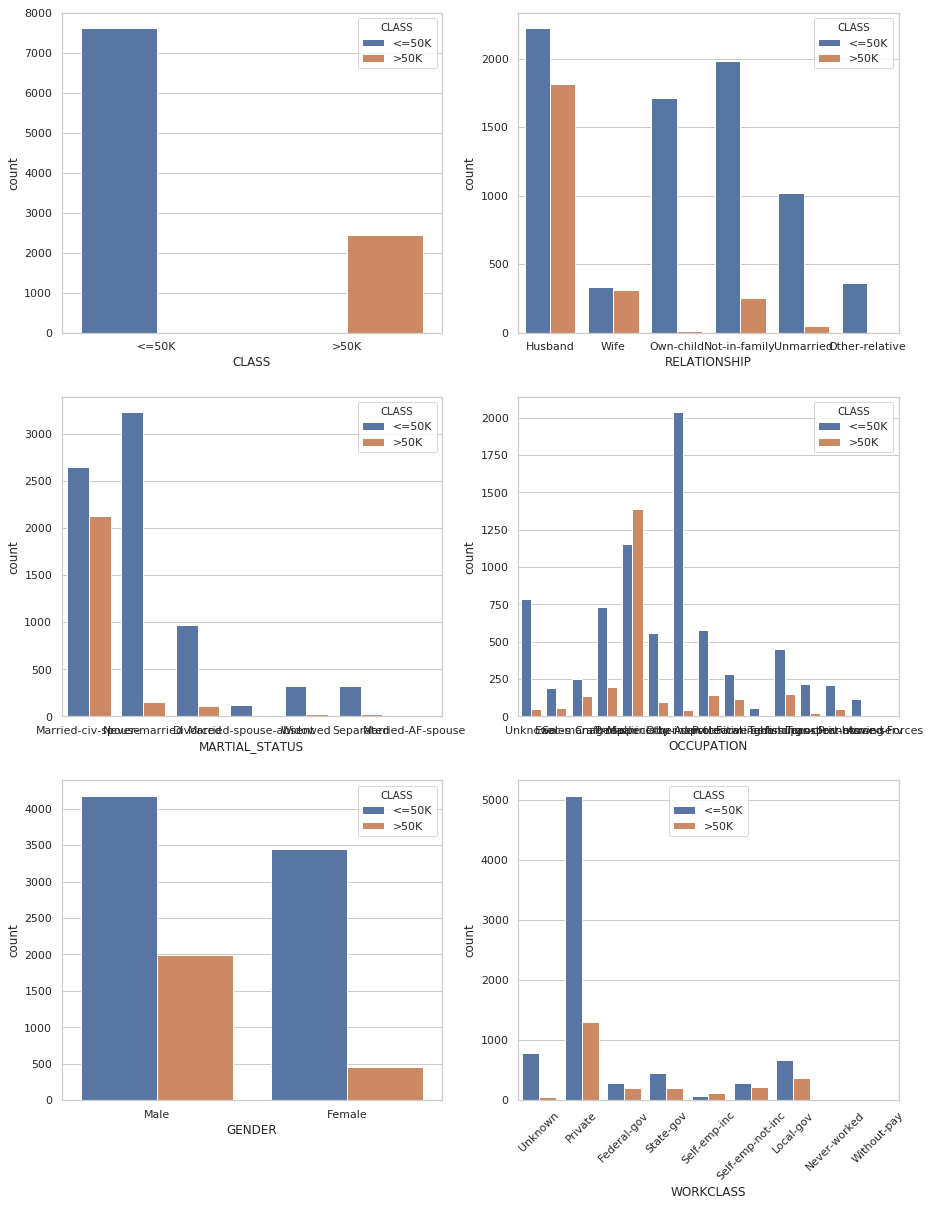

In [804]:
import seaborn as sns
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(15,20))
plt.xticks(rotation=45)
sns.countplot(data['WORKCLASS'],hue=data['CLASS'],ax=f)
sns.countplot(data['RELATIONSHIP'],hue=data['CLASS'],ax=b)
sns.countplot(data['MARTIAL_STATUS'],hue=data['CLASS'],ax=c)
sns.countplot(data['GENDER'],hue=data['CLASS'],ax=e)
sns.countplot(data['OCCUPATION'],hue=data['CLASS'],ax=d)
sns.countplot(data['CLASS'],hue=data['CLASS'],ax=a)



##Plotting data

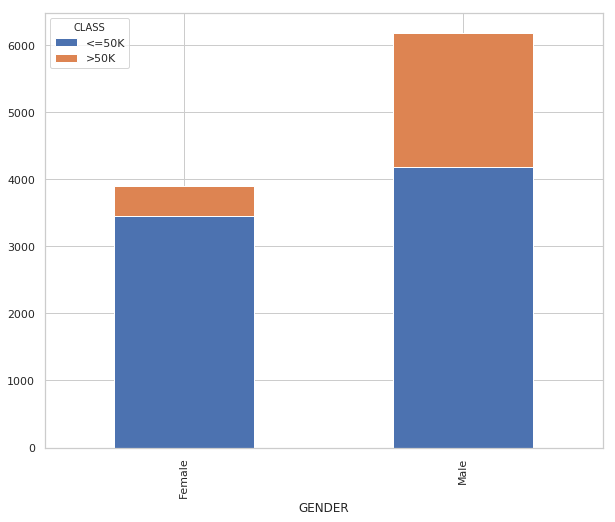

In [797]:
(data
 .groupby(['GENDER', 'CLASS'])
 .size()
 .unstack()
 .plot.bar(stacked=True)
)

# females earn less than males in both classes

In [798]:
data['CLASS'].value_counts()

<=50K    7625
>50K     2452
Name: CLASS, dtype: int64

The maximum age is 90
The minimum age is 17


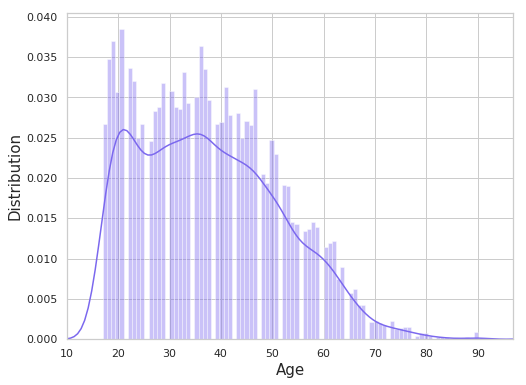

In [799]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [8, 6]
sns.set(style = 'whitegrid')

sns.distplot(data['AGE'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", data['AGE'].max())
print ("The minimum age is", data['AGE'].min())

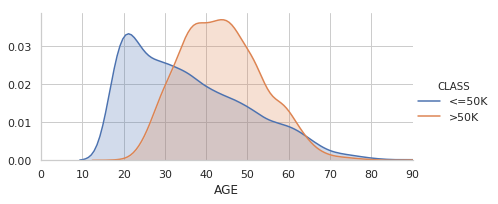

In [800]:
# Age vs income:
facet = sns.FacetGrid(data, hue="CLASS", aspect=2)
facet.map(sns.kdeplot,'AGE', shade= True)
facet.set(xlim=(0, data['AGE'].max()))
facet.add_legend()
# Looks like the income peak is between mid 30`s to late 40`s.

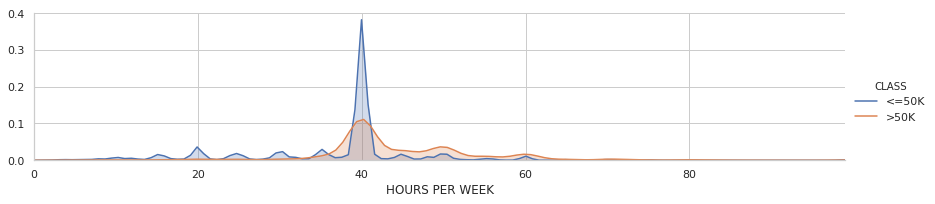

In [713]:
facet = sns.FacetGrid(data, hue="CLASS", aspect=4)
facet.map(sns.kdeplot,'HOURS PER WEEK', shade= True)
facet.set(xlim=(0, data['HOURS PER WEEK'].max()))
facet.add_legend()
# clearly shows that once you work more than 40 hours/week you get a higher income

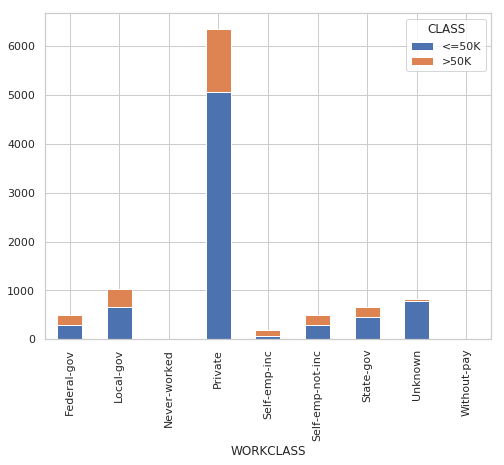

In [714]:
(data
 .groupby(['WORKCLASS', 'CLASS'])
 .size()
 .unstack()
 .plot.bar(stacked=True)
)

# private employees earn more, and are maximum in distribution

In [715]:

data.MARTIAL_STATUS.unique()

array(['Married-civ-spouse', 'Never-married', 'Divorced',
       'Married-spouse-absent', 'Widowed', 'Separated',
       'Married-AF-spouse'], dtype=object)

In [716]:
#Categorize "Marital_Status" to only 2 Categories
#data['MARTIAL_STATUS'] = data['MARTIAL_STATUS'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
#data['MARTIAL_STATUS'] = data['MARTIAL_STATUS'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'Married')



married= ['Married-civ-spouse','Married-AF-spouse','Married-spouse-absent']
separated = ['Divorced','Never-married','Separated','Widowed','Never-married','Widowed']

#replace elements in list.
data['MARTIAL_STATUS'].replace(to_replace = married ,value = 'Married',inplace = True)
data['MARTIAL_STATUS'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['MARTIAL_STATUS'].value_counts()

Separated    5167
Married      4910
Name: MARTIAL_STATUS, dtype: int64

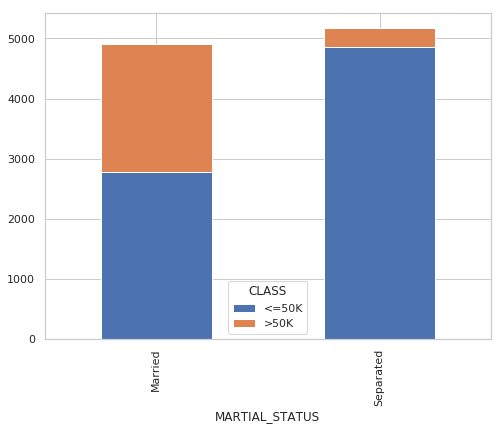

In [717]:
(data
 .groupby(['MARTIAL_STATUS', 'CLASS'])
 .size()
 .unstack()
 .plot.bar(stacked=True)
)

#looks like married ppl earn more

In [718]:
data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARTIAL_STATUS,OCCUPATION,RELATIONSHIP,GENDER,HOURS PER WEEK,COUNTRY,CLASS
0,66,Unknown,107744,Some-college,10,Married,Unknown,Husband,Male,40,United-States,<=50K
1,37,Private,106043,HS-grad,9,Married,Sales,Husband,Male,40,United-States,>50K
2,35,Private,953588,HS-grad,9,Married,Exec-managerial,Wife,Female,40,United-States,>50K
3,20,Private,157595,HS-grad,9,Married,Craft-repair,Husband,Male,40,United-States,<=50K
4,33,Unknown,207668,Bachelors,13,Separated,Unknown,Own-child,Male,40,United-States,<=50K


In [719]:
data['WORKCLASS'].value_counts()

Private             6360
Local-gov           1035
Unknown              833
State-gov            656
Self-emp-not-inc     504
Federal-gov          491
Self-emp-inc         191
Without-pay            4
Never-worked           3
Name: WORKCLASS, dtype: int64

In [0]:
#Categorize "workclass" to only few Categories
#data['WORKCLASS'] = data['WORKCLASS'].replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'], 
#                                               ['Private', 'Self-emp', 'Self-emp', 'Gov', 'Gov', 'Gov', 'Un-emp', 'Un-emp'])

In [0]:
data['WORKCLASS'] = data['WORKCLASS'].replace({'Self-emp-inc', 'Self-emp-not-inc'}, 'SelfEmployed', regex=True)
data['WORKCLASS'] = data['WORKCLASS'].replace({'Local-gov', 'State-gov', 'Federal-gov'}, 'Gov-job', regex=True)
data['WORKCLASS'] = data['WORKCLASS'].replace({'Without-pay','Never-worked'}, 'Unemployed', regex=True)

In [722]:
data['WORKCLASS'].value_counts()

Private         6360
Gov-job         2182
Unknown          833
SelfEmployed     695
Unemployed         7
Name: WORKCLASS, dtype: int64

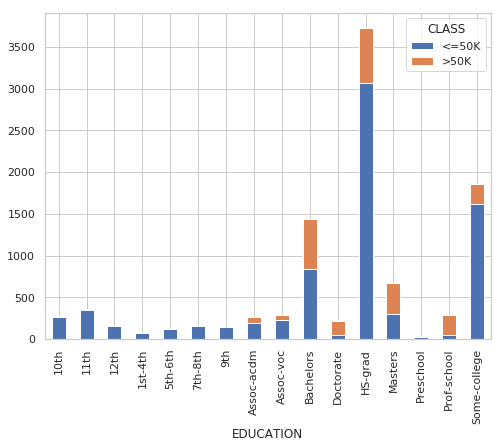

In [723]:
(data
 .groupby(['EDUCATION', 'CLASS'])
 .size()
 .unstack()
 .plot.bar(stacked=True)
)

#grads earn more

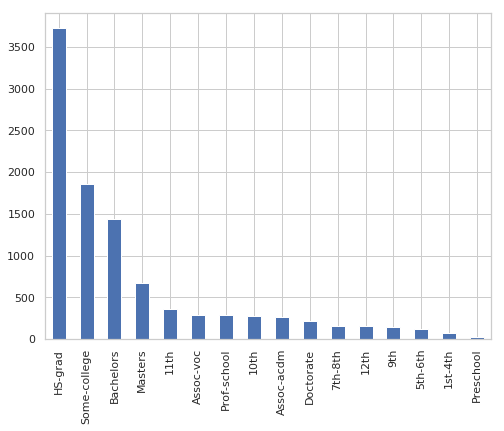

In [803]:
data["EDUCATION"].value_counts().plot(kind="bar")

In [0]:
data['EDUCATION'] = data['EDUCATION'].replace({'Preschool','1st-4th','5th-6th', '7th-8th'}, 'Elementary-School', regex=True)
data['EDUCATION'] = data['EDUCATION'].replace({'9th','10th', '11th', '12th', 'HS-grad'}, 'High-School', regex=True)
data['EDUCATION'] = data['EDUCATION'].replace({'Masters', 'Doctorate'}, 'Advanced-Studies', regex=True)
data['EDUCATION'] = data['EDUCATION'].replace({'Bachelors', 'Some-college'}, 'College', regex=True)
data['EDUCATION'] = data['EDUCATION'].replace({'Prof-school', 'Assoc-acdm', 'Assoc-voc'}, 'Professional-School', regex=True)

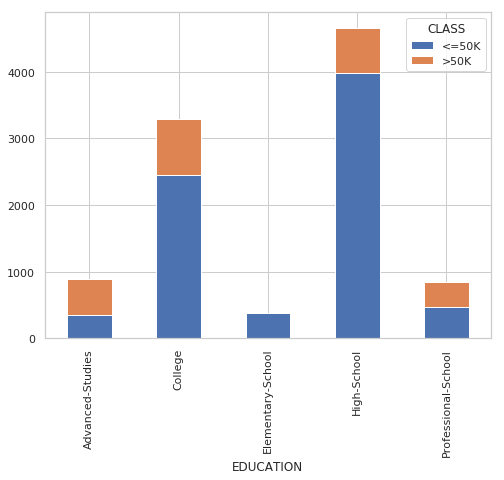

In [725]:
(data
 .groupby(['EDUCATION', 'CLASS'])
 .size()
 .unstack()
 .plot.bar(stacked=True)
)


In [726]:
#Label encode Education
datac = notnulldata.copy()
datac.isnull().sum()
datac['EDUCATION']=datac['EDUCATION'].map({'Doctorate':15,'Masters':14,'Bachelors':13,'Prof-school':12,'Some-college':11,'Assoc-acdm':10,'Assoc-voc':9,'HS-grad':8,'12th':7,'11th':6,'10th':5,'9th':4,'7th-8th':3,'5th-6th':2,'1st-4th':1,'Preschool':0}).astype(int)
datac['EDUCATION'].value_counts()

8     3387
11    1540
13    1342
14     637
6      301
12     284
9      264
10     246
5      215
15     201
7      137
3      123
4      117
2      108
1       71
0       21
Name: EDUCATION, dtype: int64

# EDUCATION_NUM analysis

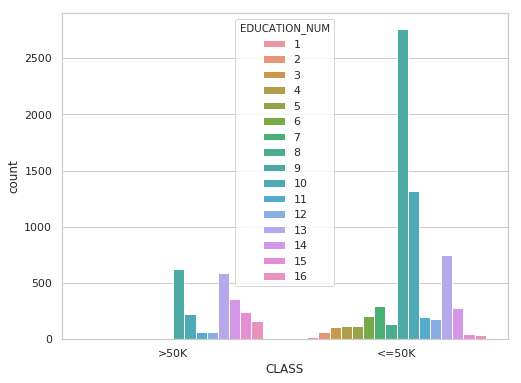

In [727]:
sns.countplot('CLASS', hue='EDUCATION_NUM', data=datac)


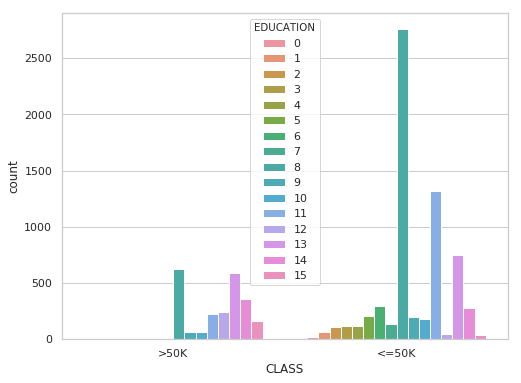

In [728]:
sns.countplot('CLASS', hue='EDUCATION', data=datac)

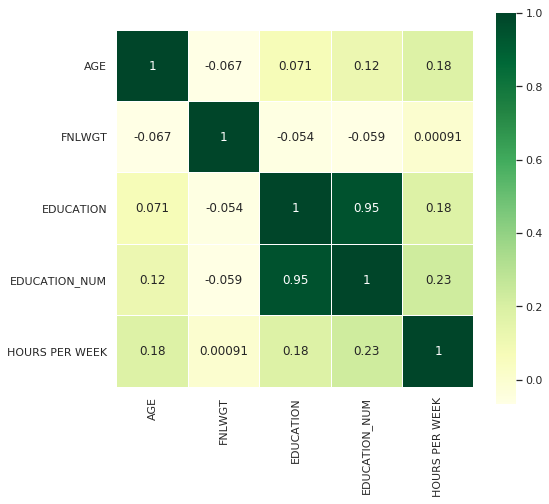

In [729]:
# as we can see above and here, in corr map education and education num are one and the same, so we will drop education num

def correlation_heatmap(data, size=8):
    corr= data.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    colormap=sns.diverging_palette(220, 10, as_cmap=True)
    fig=sns.heatmap(data.corr(), cmap = "YlGn", square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='white',annot_kws={'fontsize':12 })
correlation_heatmap(datac)


## Drop Education Num

In [0]:
#drop Education num
data.drop('EDUCATION_NUM', axis = 1, inplace = True)




In [731]:
data.dtypes

AGE                int64
WORKCLASS         object
FNLWGT             int64
EDUCATION         object
MARTIAL_STATUS    object
OCCUPATION        object
RELATIONSHIP      object
GENDER            object
HOURS PER WEEK     int64
COUNTRY           object
CLASS             object
dtype: object

#  Data Distribution

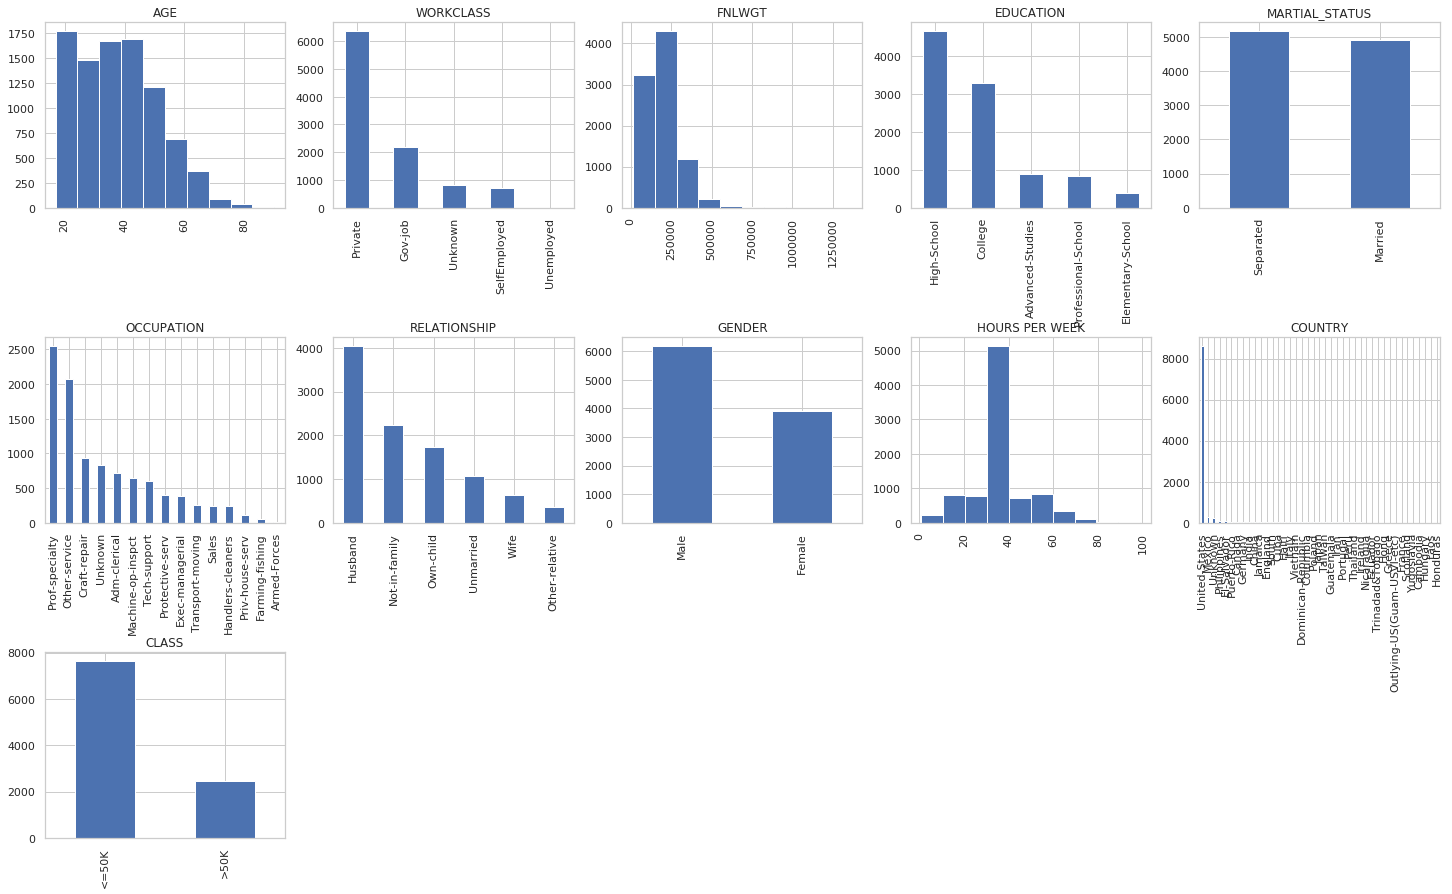

In [732]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        datac[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [0]:
#Assign back data
#datac.isnull().sum()

data = data.drop(['COUNTRY'], axis=1)





##Assign back the class data - we are done with visualization

In [734]:
#data = datac

data['CLASS'].value_counts() # look at the counts of each of 
data['CLASS'].replace(to_replace ='<=50K', value = 0,inplace = True)
data['CLASS'].replace(to_replace ='>50K', value = 1, inplace = True)


data['CLASS'].value_counts()

0    7625
1    2452
Name: CLASS, dtype: int64

## Preprocessing the data
###One hot encoding: 
Creating a column out of each value of a categorical column or variable.

In [735]:
# choose categorical and continuous features from data
data = data.drop('RELATIONSHIP', axis=1)
data = data.drop('FNLWGT', axis=1)

categorical_columns = [c for c in data.columns 
                       if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns 
                     if data[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['WORKCLASS', 'EDUCATION', 'MARTIAL_STATUS', 'OCCUPATION', 'GENDER']
numerical_columns: ['AGE', 'HOURS PER WEEK', 'CLASS']


We'll dummy code or One hot encode some categorical features: **Workclass**, **Education**, **Martial_Status**, **Occupation**, **Relationship**, **Race**, **Sex**, **Country**. It can be done via pandas method **get_dummies**

In [736]:
## this how get_dummies will return results
pd.get_dummies(data[categorical_columns]).head()

,WORKCLASS_Gov-job,WORKCLASS_Private,WORKCLASS_SelfEmployed,WORKCLASS_Unemployed,WORKCLASS_Unknown,EDUCATION_Advanced-Studies,EDUCATION_College,EDUCATION_Elementary-School,EDUCATION_High-School,EDUCATION_Professional-School,MARTIAL_STATUS_Married,MARTIAL_STATUS_Separated,OCCUPATION_Adm-clerical,OCCUPATION_Armed-Forces,OCCUPATION_Craft-repair,OCCUPATION_Exec-managerial,OCCUPATION_Farming-fishing,OCCUPATION_Handlers-cleaners,OCCUPATION_Machine-op-inspct,OCCUPATION_Other-service,OCCUPATION_Priv-house-serv,OCCUPATION_Prof-specialty,OCCUPATION_Protective-serv,OCCUPATION_Sales,OCCUPATION_Tech-support,OCCUPATION_Transport-moving,OCCUPATION_Unknown,GENDER_Female,GENDER_Male
0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [0]:
# we will use pd.get_dummies to create one hot encoding for the categorical variables and join them with the numerical columns to form the dataset
df = pd.concat([data[numerical_columns],pd.get_dummies(data[categorical_columns])], axis=1)

In [738]:
df.head()

#df = data

,AGE,HOURS PER WEEK,CLASS,WORKCLASS_Gov-job,WORKCLASS_Private,WORKCLASS_SelfEmployed,WORKCLASS_Unemployed,WORKCLASS_Unknown,EDUCATION_Advanced-Studies,EDUCATION_College,EDUCATION_Elementary-School,EDUCATION_High-School,EDUCATION_Professional-School,MARTIAL_STATUS_Married,MARTIAL_STATUS_Separated,OCCUPATION_Adm-clerical,OCCUPATION_Armed-Forces,OCCUPATION_Craft-repair,OCCUPATION_Exec-managerial,OCCUPATION_Farming-fishing,OCCUPATION_Handlers-cleaners,OCCUPATION_Machine-op-inspct,OCCUPATION_Other-service,OCCUPATION_Priv-house-serv,OCCUPATION_Prof-specialty,OCCUPATION_Protective-serv,OCCUPATION_Sales,OCCUPATION_Tech-support,OCCUPATION_Transport-moving,OCCUPATION_Unknown,GENDER_Female,GENDER_Male
0,66,40,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,37,40,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,35,40,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,20,40,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,33,40,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


##From Assignment


Using the codes you wrote for previous question, use the entire pipeline to create 3 decision trees and calculate the average accuracy from them.
This will give you a good practice and help you in understanding different parameters in decision tree.

Parameters for the decision tree:
1. 1st Decision tree -  random_state = 42
2. 2nd Decision tree - random_state = 30
3. 3rd Decision tree - random_state = 30, max_depth = 5
4. 4th Decision tree - random_state = 30,min_impurity_decrease  = 0.01
4. 5th decision tree - random_state = 30, criterion = "entropy"


In [0]:
#Code for splitting data set
# splitting the dataset in to train and test, this was not done in the previous question, refer the code shared in class for the code for this
# note for spitting the dataset keep test_size =0.3, random state = 42, so that your answers are reporducible and similar to my answers

df_train, df_val = train_test_split(df, test_size=0.3)


# fill missing data, not needed here 
'''
categorical_columns = [c for c in df_train.columns 
                       if df_train[c].dtype.name == 'object']
numerical_columns = [c for c in df_train.columns 
                     if df_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)
print('*'*50)
print(df_train.describe())

for c in categorical_columns:
    df_train[c].fillna(df_train[c].mode(), inplace=True)
    
for c in numerical_columns:
    df_train[c].fillna(df_train[c].median(), inplace=True)
print('*'*50)    
print(df_train.describe())
'''

# features to consider for model building
df_train.head()
X = df_train.drop('CLASS', axis=1)
y = df_train['CLASS']
features = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


##KNeighborsClassifier

In [753]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

In [754]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(knn.score(X_train, y_train))
y_pred = knn.predict(X_train)
print(confusion_matrix(y_pred, y_train))  
print(classification_report(y_pred, y_train, target_names=[">50K", "<50K"]))

0.8165544133286069
[[3945  733]
 [ 302  662]]
              precision    recall  f1-score   support

        >50K       0.93      0.84      0.88      4678
        <50K       0.47      0.69      0.56       964

    accuracy                           0.82      5642
   macro avg       0.70      0.77      0.72      5642
weighted avg       0.85      0.82      0.83      5642



##Logistic Regression

In [755]:
# Now let`s try: LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
y_pred = logreg.predict(X_train)
print(confusion_matrix(y_pred, y_train)) 
print(classification_report(y_pred, y_train))

0.8449131513647643
[[3970  598]
 [ 277  797]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      4568
           1       0.57      0.74      0.65      1074

    accuracy                           0.84      5642
   macro avg       0.75      0.81      0.77      5642
weighted avg       0.87      0.84      0.85      5642



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [757]:
print(logreg.score(X_test, y_test))
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_pred, y_test)) 
print(classification_report(y_pred, y_test))
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.8547129695251595
[[1025  147]
 [  58  181]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1172
           1       0.55      0.76      0.64       239

    accuracy                           0.85      1411
   macro avg       0.75      0.82      0.77      1411
weighted avg       0.88      0.85      0.86      1411

[[1025  147]
 [  58  181]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1172
           1       0.55      0.76      0.64       239

    accuracy                           0.85      1411
   macro avg       0.75      0.82      0.77      1411
weighted avg       0.88      0.85      0.86      1411



In [758]:
# Last but not least, let`s try: random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=9, verbose=1)
forest.fit(X_train, y_train) # if you don`t like the overfit feel free to use max_features and max_depth, you might even get a slightly higher f1 ;) 
print(forest.score(X_train, y_train))
y_pred = forest.predict(X_train)
print(confusion_matrix(y_pred, y_train)) 
print(classification_report(y_pred, y_train, target_names=[">50K", "<50K"]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9542715349166963
[[4176  187]
 [  71 1208]]
              precision    recall  f1-score   support

        >50K       0.98      0.96      0.97      4363
        <50K       0.87      0.94      0.90      1279

    accuracy                           0.95      5642
   macro avg       0.92      0.95      0.94      5642
weighted avg       0.96      0.95      0.95      5642



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


In [760]:
print(forest.score(X_test, y_test))
y_pred = forest.predict(X_test)
print(confusion_matrix(y_pred, y_test)) 
print(classification_report(y_pred, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8242381289865344
[[977 142]
 [106 186]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1119
           1       0.57      0.64      0.60       292

    accuracy                           0.82      1411
   macro avg       0.73      0.76      0.74      1411
weighted avg       0.83      0.82      0.83      1411



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


#### Conclusion: if we want high score on X_val go with logreg or..
####  if looking for as many true positives as possible (without modifying the recall) will go with random forest... 

#from Prev. Assignments

##Decision tree

In [762]:
#1st Decision tree - random_state = 42-----------------------------------

clf1 = DecisionTreeClassifier(random_state=42,) # random state helps you in reporducing your results by setting up seed
# Fit or train the decision tree for your training set
clf1.fit(df_train[features], df_train['CLASS'])

# Make predictions
predictions = clf1.predict(df_train[features])
pd.DataFrame(data = {'Actual Label':df_train['CLASS'], 'Predicted Label':predictions})

valpredictions = clf1.predict(df_val[features])
pd.DataFrame(data = {'Actual Label':df_val['CLASS'], 'Predicted Label':valpredictions})

score1 = clf1.score(df_train[features], df_train['CLASS'])
score_1 = clf1.score(df_val[features], df_val['CLASS'])
# calculate accuracy for 1st decsion tree
print(" 1st Decision tree - random_state = 42; Validation data Accuracy: ", round(score_1,5))
print('{:.2%}'.format(score_1),"percent")

 1st Decision tree - random_state = 42; Validation data Accuracy:  0.82507
82.51% percent


In [763]:
#2nd Decision tree - random_state = 30
clf2 = DecisionTreeClassifier(random_state=30,) 
clf2.fit(df_train[features], df_train['CLASS'])

# Make predictions
predictions = clf2.predict(df_train[features])
pd.DataFrame(data = {'Actual Label':df_train['CLASS'], 'Predicted Label':predictions})

valpredictions = clf2.predict(df_val[features])
pd.DataFrame(data = {'Actual Label':df_val['CLASS'], 'Predicted Label':valpredictions})

score1 = clf2.score(df_train[features], df_train['CLASS'])
score_2 = clf2.score(df_val[features], df_val['CLASS'])
# calculate accuracy for 1st decsion tree
print(" 2nd Decision tree - random_state = 30; Validation data Accuracy: ", round(score_2,5))
print('{:.2%}'.format(score_2),"percent")


 2nd Decision tree - random_state = 30; Validation data Accuracy:  0.82209
82.21% percent


In [764]:
#3rd Decision tree - random_state = 30, max_depth = 5
clf3 = DecisionTreeClassifier(random_state=30, max_depth = 5) 
clf3.fit(df_train[features], df_train['CLASS'])

# Make predictions
predictions = clf3.predict(df_train[features])
pd.DataFrame(data = {'Actual Label':df_train['CLASS'], 'Predicted Label':predictions})

valpredictions = clf3.predict(df_val[features])
pd.DataFrame(data = {'Actual Label':df_val['CLASS'], 'Predicted Label':valpredictions})

score1 = clf3.score(df_train[features], df_train['CLASS'])
score_3 = clf3.score(df_val[features], df_val['CLASS'])
# calculate accuracy for 1st decsion tree
print(" 3rd Decision tree - random_state = 30, max_depth = 5; Validation data Accuracy: ", round(score_3,5))
print('{:.2%}'.format(score_3),"percent")


 3rd Decision tree - random_state = 30, max_depth = 5; Validation data Accuracy:  0.85351
85.35% percent


In [765]:
#4th Decision tree - random_state = 30,min_impurity_decrease = 0.01
clf4 = DecisionTreeClassifier(random_state = 30,min_impurity_decrease = 0.01) 
clf4.fit(df_train[features], df_train['CLASS'])

# Make predictions
predictions = clf4.predict(df_train[features])
pd.DataFrame(data = {'Actual Label':df_train['CLASS'], 'Predicted Label':predictions})

valpredictions = clf4.predict(df_val[features])
pd.DataFrame(data = {'Actual Label':df_val['CLASS'], 'Predicted Label':valpredictions})

score1 = clf4.score(df_train[features], df_train['CLASS'])
score_4 = clf4.score(df_val[features], df_val['CLASS'])
# calculate accuracy for 1st decsion tree
print(" 4th Decision tree - random_state = 30,min_impurity_decrease = 0.01; Validation data Accuracy: ", round(score_4,5))
print('{:.2%}'.format(score_4),"percent")


 4th Decision tree - random_state = 30,min_impurity_decrease = 0.01; Validation data Accuracy:  0.84888
84.89% percent


In [766]:
#5th Decision tree - random_state = 30, criterion = "entropy"

clf5 = DecisionTreeClassifier(random_state = 30, criterion = "entropy") 
clf5.fit(df_train[features], df_train['CLASS'])

# Make predictions
predictions = clf5.predict(df_train[features])
pd.DataFrame(data = {'Actual Label':df_train['CLASS'], 'Predicted Label':predictions})

valpredictions = clf5.predict(df_val[features])
pd.DataFrame(data = {'Actual Label':df_val['CLASS'], 'Predicted Label':valpredictions})

score1 = clf5.score(df_train[features], df_train['CLASS'])
score_5 = clf5.score(df_val[features], df_val['CLASS'])
# calculate accuracy for 1st decsion tree
print(" 5th Decision tree - random_state = 30, criterion = entropy; Validation data Accuracy: ", round(score_5,5))
print('{:.2%}'.format(score_5),"percent")



 5th Decision tree - random_state = 30, criterion = entropy; Validation data Accuracy:  0.81978
81.98% percent


In [767]:
score_avg = (score_1 + score_2+ score_3 + score_4 + score_5 )/5

print(score_avg)


score_avg3 = (score_1 + score_2+ score_3)/3
print(score_avg3)

0.8338624338624339
0.8335537918871253


<b> Question 6: Visualise the 3rd Decision tree from previous question. Look at level 3 nodes and identify which node has minimum gini impurity. Select the feature name in this node from the options below. Note: Consider Root node as level 0 nodes, 1st set of internal nodes as level 1 nodes.

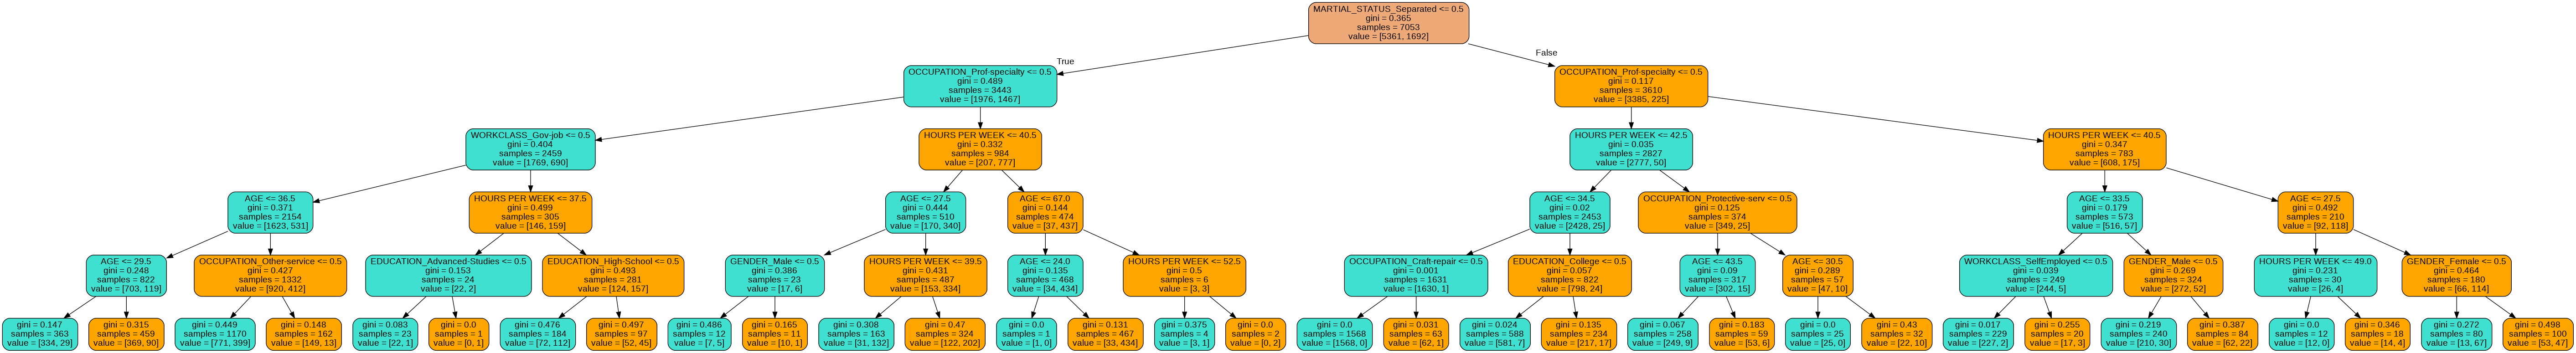

In [745]:
# code for visualisation

dot_data = tree.export_graphviz(clf3,
                                feature_names=features,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

Image(graph.create_png())


#MARITAL_STATUS 


<b>Qustion 7: Use grid search with cv=3 and param_grid as shown below (rest parameters as default) and train a decision tree (use DecisionTreeClassifier(random_state=17) to initialise the decision tree) to find the best max_depth for the tree. Use param_grid = {
    'max_depth': range(2,11)
}

In [768]:
# code for grid search

forest_params = {'max_depth': range(2, 11),}

locally_best_forest = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                   forest_params, cv=3, verbose=1)

locally_best_forest.fit(df_train[features], df_train['CLASS'])

gpredictions = locally_best_forest.predict(df_val[features])
print(confusion_matrix(df_val['CLASS'],gpredictions))
print(classification_report(df_val['CLASS'],gpredictions))
score = locally_best_forest.score(df_val[features], df_val['CLASS'])
print("Accuracy: ", round(score,3))

print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)



Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[2133  162]
 [ 259  470]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2295
           1       0.74      0.64      0.69       729

    accuracy                           0.86      3024
   macro avg       0.82      0.79      0.80      3024
weighted avg       0.86      0.86      0.86      3024

Accuracy:  0.861
Best params: {'max_depth': 6}
Best cross validaton score 0.8518360981142776


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.4s finished


<b>Question 8: Train a random forest on the training dataset and calculate the accuracy, precision and recall on the test data or validation data. Split your the adult dataset as earlier with random state = 42. Random state for random forest classisier should be 50, number of trees = 100, keeping rest all as default. Print the confusion matrix and tell us the number of TP, FP, FN, TN.

In [769]:
df_train, df_val = train_test_split(df, test_size=0.3, random_state = 42)
# Initialise Random Forest
rndclf = RandomForestClassifier(n_estimators=100 , oob_score = True, n_jobs = -1,random_state =50, max_features = None)
rndclf1 = RandomForestClassifier(n_estimators=100,  n_jobs = -1,random_state =50)
# Fit on training data
rndclf.fit(df_train[features], df_train['CLASS'])

# Make predictions
predictions = rndclf.predict(df_val[features])
probs = rndclf.predict_proba(df_val[features])

# Performance measures
score = rndclf.score(df_val[features], df_val['CLASS'])
print("Accuracy: ", score)
print(classification_report(df_val['CLASS'],predictions))
print('*'*50)
print(confusion_matrix(df_val['CLASS'],predictions))






Accuracy:  0.8326719576719577
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2260
           1       0.69      0.62      0.65       764

    accuracy                           0.83      3024
   macro avg       0.78      0.76      0.77      3024
weighted avg       0.83      0.83      0.83      3024

**************************************************
[[2044  216]
 [ 290  474]]


In [770]:
#get
print(confusion_matrix(df_val['CLASS'],predictions))
tn, fp, fn, tp = confusion_matrix(df_val['CLASS'],predictions).ravel()

#TP, FP, FN, TN.
print('True Positive:', tp,  'False Positive:', fp)
print('False Negative:', fn, 'True Negative:', tn)



[[2044  216]
 [ 290  474]]
True Positive: 474 False Positive: 216
False Negative: 290 True Negative: 2044


<b>Question 9: Use Random search from scikit learn with cv=3 and param_distributions as shown below, random_sate = 42, iter =5 (rest parameters as default) and train a random forest(use RandomForestClassifier(random_state=42) to initialise the Random forest) to find the best estimator. 

Use param_distributions= {'bootstrap': [True, False],
 'max_depth': range(10,100,20),
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': range(100,1000,200)}.
  
  
  Calculate the % improvement in the accuracy from the best estimator compared to the vanilla random forest model created in previous question.

  Refer to the link: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [0]:
#RandomizedSearchCV(estimator = rf, param_distributions = param_distributions, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [771]:
from sklearn.model_selection import RandomizedSearchCV
X, y = df_train[features], df_train['CLASS']

# build a classifier
clf11 = RandomForestClassifier(random_state=42)
clf =RandomForestClassifier(random_state=42, n_jobs = -1, max_features = None)

# specify parameters and distributions to sample from
param_dist = {'bootstrap': [True, False], 'max_depth': range(10,100,20), 'min_samples_leaf': [1, 2, 4], 'n_estimators': range(100,1000,200)}

# run randomized search
random_search = RandomizedSearchCV(estimator = clf, param_distributions = param_dist, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)


random_search.fit(X, y)



# Make predictions
predictions = random_search.predict(df_val[features])
probs = random_search.predict_proba(df_val[features])

# Performance measures
score = random_search.score(df_val[features], df_val['CLASS'])
print("Accuracy: ", score)
print(classification_report(df_val['CLASS'],predictions))
print('*'*50)
print(confusion_matrix(df_val['CLASS'],predictions))



Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


Accuracy:  0.8429232804232805
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2260
           1       0.72      0.62      0.67       764

    accuracy                           0.84      3024
   macro avg       0.80      0.77      0.78      3024
weighted avg       0.84      0.84      0.84      3024

**************************************************
[[2076  184]
 [ 291  473]]


In [751]:
best_randsearch = random_search.best_estimator_
rpredictions = random_search.predict(df_val[features])

# Performance measures
rscore = best_randsearch.score(df_val[features], df_val['CLASS'])
print("Accuracy: ", rscore)
print(confusion_matrix(df_val['CLASS'],rpredictions))
print(classification_report(df_val['CLASS'],rpredictions))

 increase in percentage: 1

Accuracy:  0.8429232804232805
[[2076  184]
 [ 291  473]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2260
           1       0.72      0.62      0.67       764

    accuracy                           0.84      3024
   macro avg       0.80      0.77      0.78      3024
weighted avg       0.84      0.84      0.84      3024

